# Royal Weapons analysis for negative crit rate

This document is the continuation of the analysis of the Royal Weapons
found [here](./royal-positive.ipynb). Detailed explanations of the
methodology is on that file so I will be brief here.

The goal is to find how the Royal Weapons behave when the initial
crit rate is negative, specifically for Kokomi, but it may be possible
to get negative crit rate in other scenarios like events.

The first thing to explain is that, probabilistically speaking, 
negative values of crit rate are equivalent to zero probability of
scoring a crit. However, the problem appears when we are trying to
add stacks to a negative crit rate. There is an example of the 
problem we have when dealing with negative crit rate:

Imagine that we have -80% crit rate and a Royal weapon at R1.
This will allow us to gain 5 stacks for sure, but since the crit rate
is still negative ($-80\% + 5 \times 8\% = -40\%$), the actual probability 
of scoring a crit is still zero.

Now let's change the example: we have -35% crit rate and a Royal weapon at R1.
At 4 stacks, we will have a crit rate of $-35\% + 4 \times 8\% = -3\%$, 
**still negative**. But, when scoring the next non-crit hit, we will
get 5 stacks, increasing the crit rate to $5\%$, **a positive value**.

## 0. Setup
Ignore this section, i'm loading the code from the other notebook.
Skip to section 1.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


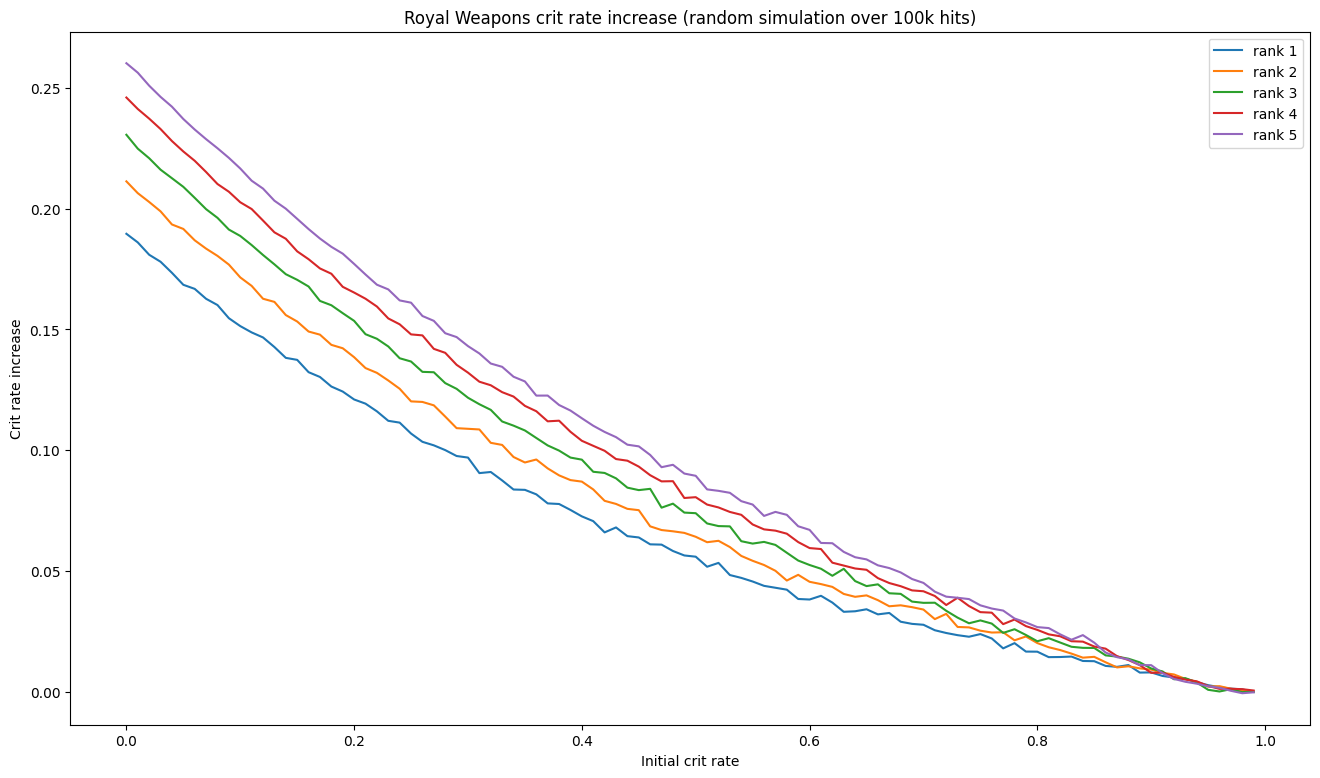

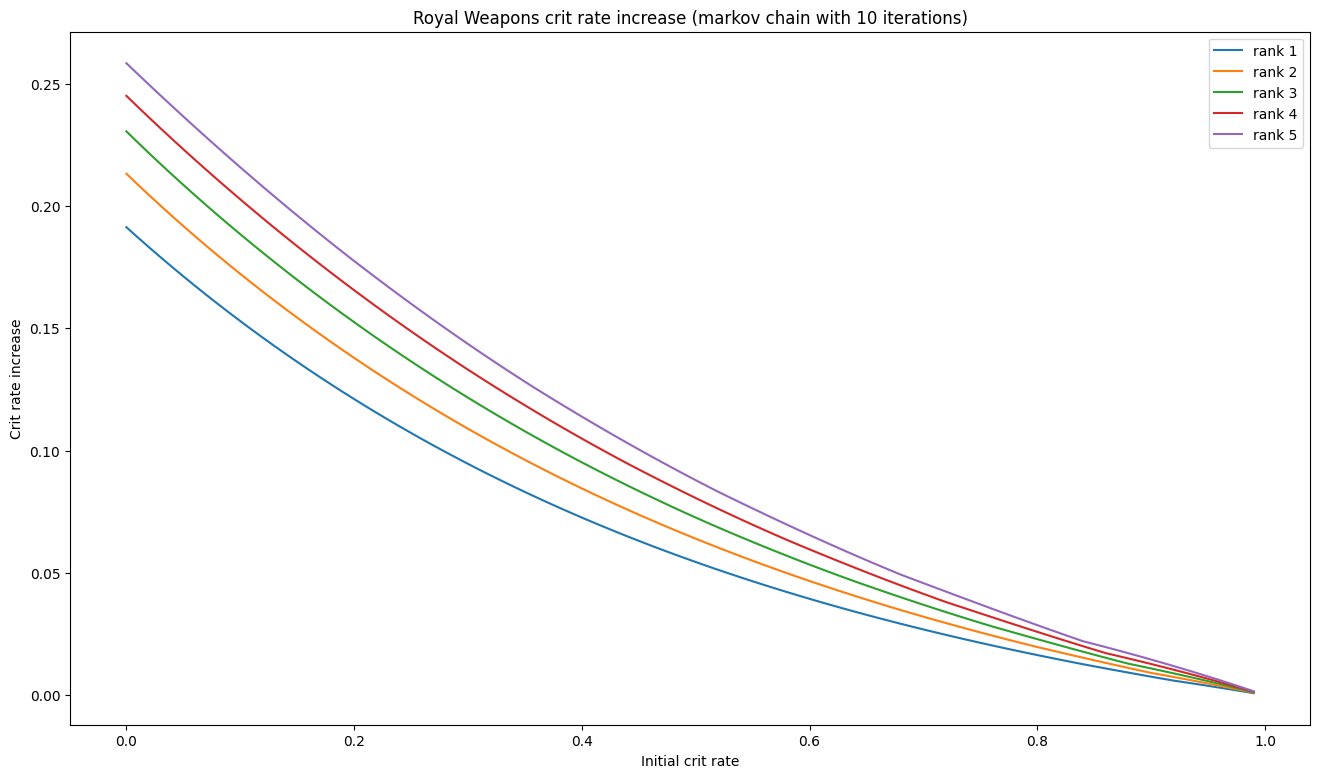

x0

(5*p + r)/(6*p**4*r - 6*p**4 + 11*p**3*r**2 - 26*p**3*r + 15*p**3 + 6*p**2*r**3 - 24*p**2*r**2 + 33*p**2*r - 15*p**2 + p*r**4 - 6*p*r**3 + 15*p*r**2 - 20*p*r + 15*p + 1)

x1

(-5*p*r + 5*p - r**2 + r)/(6*p**4*r - 6*p**4 + 11*p**3*r**2 - 26*p**3*r + 15*p**3 + 6*p**2*r**3 - 24*p**2*r**2 + 33*p**2*r - 15*p**2 + p*r**4 - 6*p*r**3 + 15*p*r**2 - 20*p*r + 15*p + 1)

x2

(5*p**2*r - 5*p**2 + 6*p*r**2 - 11*p*r + 5*p + r**3 - 2*r**2 + r)/(6*p**4*r - 6*p**4 + 11*p**3*r**2 - 26*p**3*r + 15*p**3 + 6*p**2*r**3 - 24*p**2*r**2 + 33*p**2*r - 15*p**2 + p*r**4 - 6*p*r**3 + 15*p*r**2 - 20*p*r + 15*p + 1)

x3

(-10*p**3*r + 10*p**3 - 17*p**2*r**2 + 32*p**2*r - 15*p**2 - 8*p*r**3 + 21*p*r**2 - 18*p*r + 5*p - r**4 + 3*r**3 - 3*r**2 + r)/(6*p**4*r - 6*p**4 + 11*p**3*r**2 - 26*p**3*r + 15*p**3 + 6*p**2*r**3 - 24*p**2*r**2 + 33*p**2*r - 15*p**2 + p*r**4 - 6*p*r**3 + 15*p*r**2 - 20*p*r + 15*p + 1)

x4

(30*p**4*r - 30*p**4 + 61*p**3*r**2 - 116*p**3*r + 55*p**3 + 41*p**2*r**3 - 112*p**2*r**2 + 101*p**2*r - 30*p**2 + 11*p*r**4 - 38*p*r**3 + 48*p*r**2 - 26*p*r + 5*p + r**5 - 4*r**4 + 6*r**3 - 4*r**2 + r)/(6*p**4*r - 6*p**4 + 11*p**3*r**2 - 26*p**3*r + 15*p**3 + 6*p**2*r**3 - 24*p**2*r**2 + 33*p**2*r - 15*p**2 + p*r**4 - 6*p*r**3 + 15*p*r**2 - 20*p*r + 15*p + 1)

x5

(-24*p**4*r + 24*p**4 - 50*p**3*r**2 + 100*p**3*r - 50*p**3 - 35*p**2*r**3 + 105*p**2*r**2 - 105*p**2*r + 35*p**2 - 10*p*r**4 + 40*p*r**3 - 60*p*r**2 + 40*p*r - 10*p - r**5 + 5*r**4 - 10*r**3 + 10*r**2 - 5*r + 1)/(6*p**4*r - 6*p**4 + 11*p**3*r**2 - 26*p**3*r + 15*p**3 + 6*p**2*r**3 - 24*p**2*r**2 + 33*p**2*r - 15*p**2 + p*r**4 - 6*p*r**3 + 15*p*r**2 - 20*p*r + 15*p + 1)

(5*p + r)/(6*p**4*r - 6*p**4 + 11*p**3*r**2 - 26*p**3*r + 15*p**3 + 6*p**2*r**3 - 24*p**2*r**2 + 33*p**2*r - 15*p**2 + p*r**4 - 6*p*r**3 + 15*p*r**2 - 20*p*r + 15*p + 1)


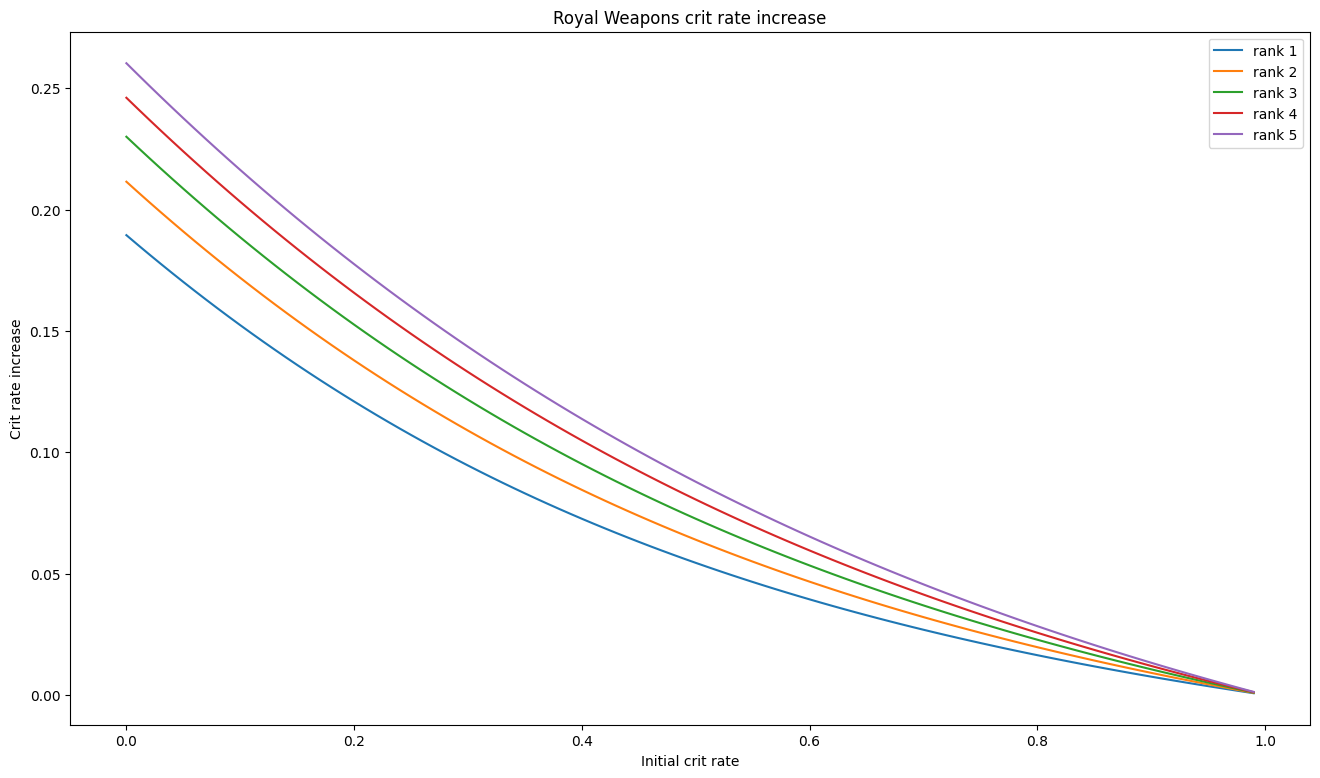

(5*p + r)/(6*p**4*r - 6*p**4 + 11*p**3*r**2 - 26*p**3*r + 15*p**3 + 6*p**2*r**3 - 24*p**2*r**2 + 33*p**2*r - 15*p**2 + p*r**4 - 6*p*r**3 + 15*p*r**2 - 20*p*r + 15*p + 1)


In [94]:
%pip install nbformat
%run royal-positive.ipynb

## 1. Analysis via random simulation

As in the previous notebook, we will use a random simulation to
get an estimated look of the Royal Weapons behavior, but for
negative crit rate.

In [95]:
domain = np.arange(-1, 0, 0.01) # values of r
results = {} # dictionary to store results
n = 100000   # number of hits to simulate

for rank in range(1, 6):
    label = f'rank {rank}' # label for the plot
    results[label] = [] # initialize list for results
    for r0 in domain: # iterate over r values
        p = royal_sim(r0, rank, n) # simulate crit rate
        p = p - max(0, r0) # what we want to know is the crit rate increase
        results[label].append(p)

Text(0, 0.5, 'Crit rate increase')

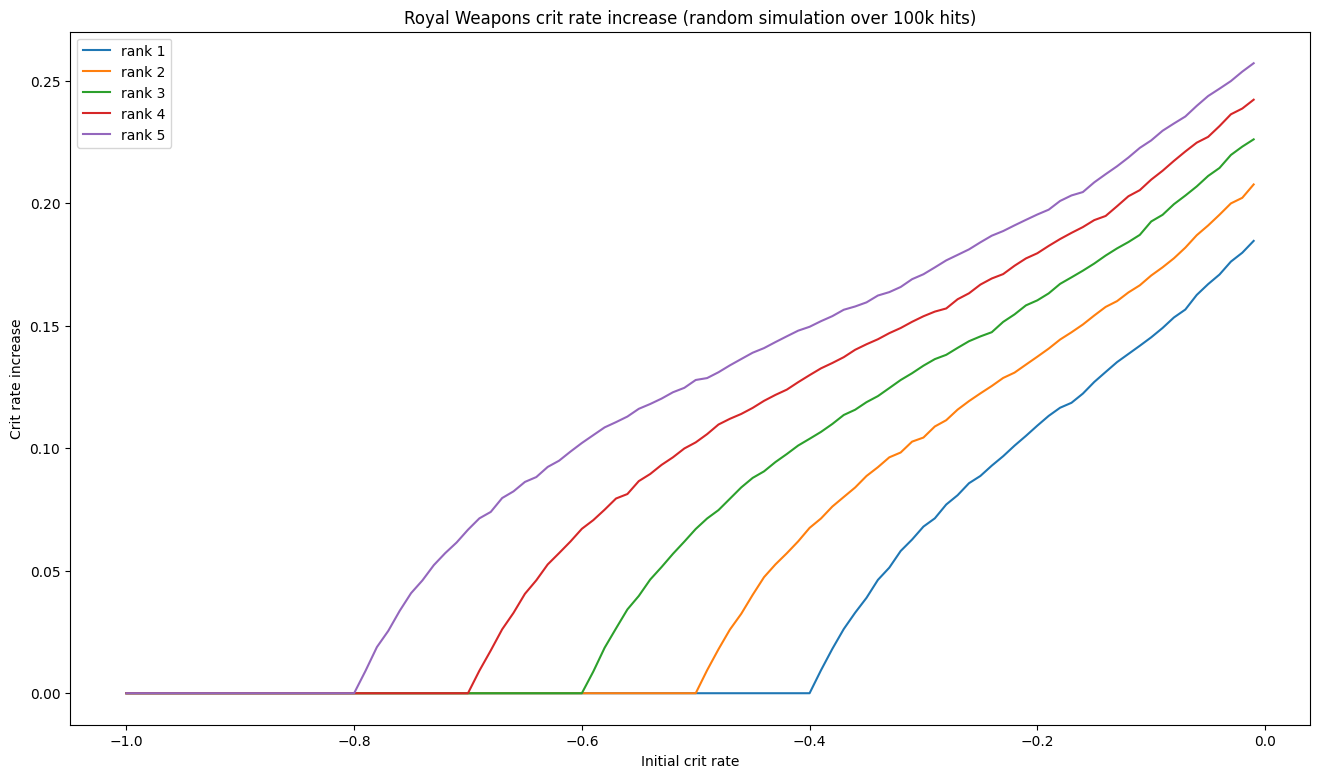

In [96]:
fig, ax = plt.subplots(figsize=(16, 9))
for label in results:
    ax.plot(domain, results[label], label=label)
ax.legend()

ax.set_title("Royal Weapons crit rate increase (random simulation over 100k hits)")
ax.set_xlabel("Initial crit rate")
ax.set_ylabel("Crit rate increase")

This figure now describes how the crit rate increases in terms
of the initial (negative) crit rate. Note that the value starts
to increase at very specific values of the initial crit rate:

- -80% at R5
- -70% at R4
- -60% at R3
- -50% at R2
- -40% at R1

Those values are also the maximum crit rate that can be achieved
at full stacks.

However, the curve has the same problem as the previous notebook:
simulation using random numbers is not very precise, so let's
move to Markov.

## 2. Analysis via Markov chains

### 2.1. Simulation
Let's see if we can replicate the simulation results by clamping
the probabilities in the expected values to positive values.

In [97]:
P = royal(-0.35, 0.08, 10)
sum(P[i] * max(0, -0.35 + i * 0.08) for i in range(6))

0.03868904687500004

### 2.3. Running the simulation for different values of $r$ and $p$

The idea is to run the Markov simulation for different values of $r$ and $p$,
and see if the results are similar to the ones obtained by random simulation.

In [98]:
domain = np.arange(-1, 0, 0.01) # values of r
results = {} # dictionary to store results
n = 100 # number of hits, had to increase this to get closer results

for rank in range(1, 6):
    label = f'rank {rank}' # label for the plot
    stack = 0.08 + 0.02*(rank - 1) # stack value per rank
    results[label] = [] # initialize list for results
    for r0 in domain: # iterate over r values
        P = royal(r0, stack, n) # compute probability vector
        p = sum(P[i] * max(0, r0 + i * stack) for i in range(6)) # compute expected value
        p = p - max(0, r0) # what we want to know is the crit rate increase
        results[label].append(p)

Text(0, 0.5, 'Crit rate increase')

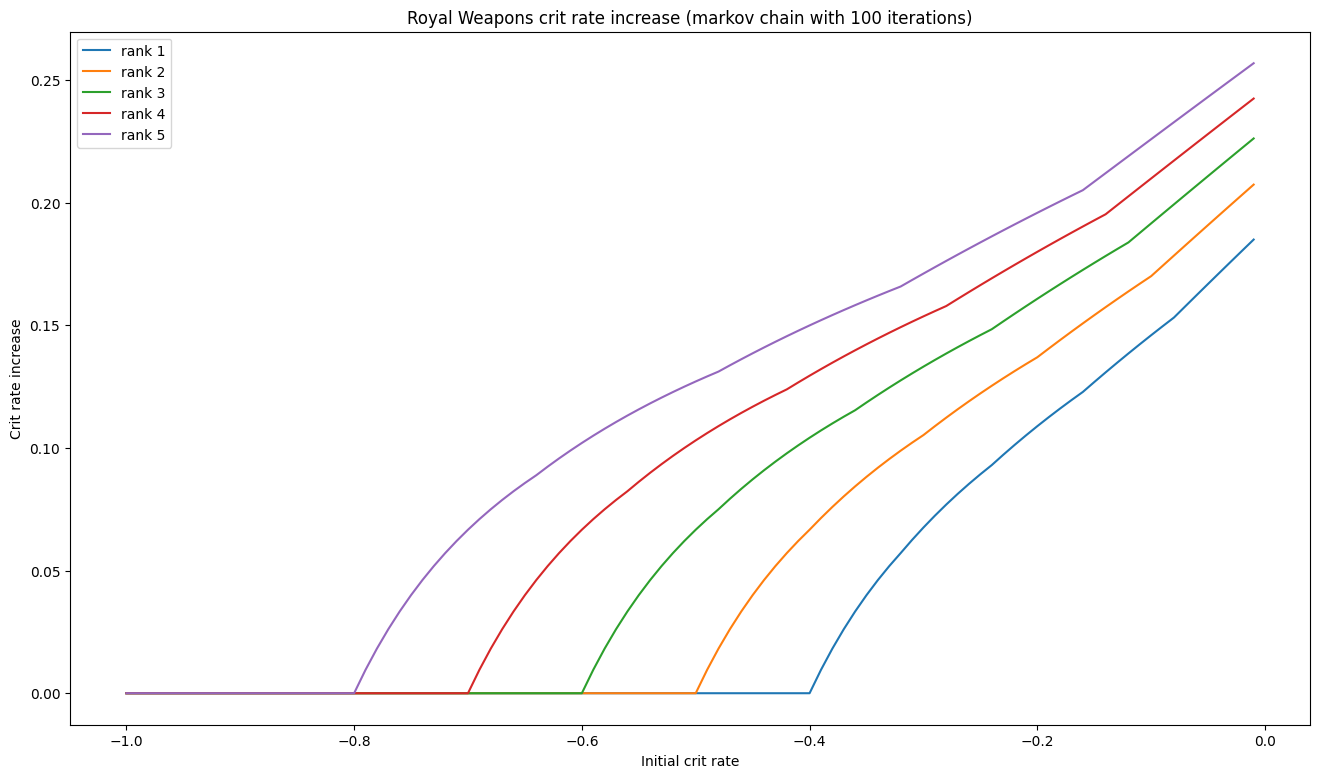

In [99]:
fig, ax = plt.subplots(figsize=(16, 9))
for label in results:
    ax.plot(domain, results[label], label=label)
ax.legend()

ax.set_title("Royal Weapons crit rate increase (markov chain with 100 iterations)")
ax.set_xlabel("Initial crit rate")
ax.set_ylabel("Crit rate increase")

Success. Both plots are very similar, our Markov simulation can
describe the Royal Weapons behavior for negative crit rate, we
just need to clamp the probabilities to positive values.

### 2.3. Finding the steady state of the system
Now, the algebraic part: finding the equation that describes the
expected value of the crit rate using the steady state of the system.

In [100]:
from sympy import Max
r, p = symbols('r p')
E = sum(solution[xi] * Max(0, r + i * p) for i, xi in enumerate(x))
E = simplify(E)
print(E)
E

((5*p + r)*Max(0, r) - (5*p*r - 5*p + r**2 - r)*Max(0, p + r) + (5*p**2*r - 5*p**2 + 6*p*r**2 - 11*p*r + 5*p + r**3 - 2*r**2 + r)*Max(0, 2*p + r) - (10*p**3*r - 10*p**3 + 17*p**2*r**2 - 32*p**2*r + 15*p**2 + 8*p*r**3 - 21*p*r**2 + 18*p*r - 5*p + r**4 - 3*r**3 + 3*r**2 - r)*Max(0, 3*p + r) + (30*p**4*r - 30*p**4 + 61*p**3*r**2 - 116*p**3*r + 55*p**3 + 41*p**2*r**3 - 112*p**2*r**2 + 101*p**2*r - 30*p**2 + 11*p*r**4 - 38*p*r**3 + 48*p*r**2 - 26*p*r + 5*p + r**5 - 4*r**4 + 6*r**3 - 4*r**2 + r)*Max(0, 4*p + r) - (24*p**4*r - 24*p**4 + 50*p**3*r**2 - 100*p**3*r + 50*p**3 + 35*p**2*r**3 - 105*p**2*r**2 + 105*p**2*r - 35*p**2 + 10*p*r**4 - 40*p*r**3 + 60*p*r**2 - 40*p*r + 10*p + r**5 - 5*r**4 + 10*r**3 - 10*r**2 + 5*r - 1)*Max(0, 5*p + r))/(6*p**4*r - 6*p**4 + 11*p**3*r**2 - 26*p**3*r + 15*p**3 + 6*p**2*r**3 - 24*p**2*r**2 + 33*p**2*r - 15*p**2 + p*r**4 - 6*p*r**3 + 15*p*r**2 - 20*p*r + 15*p + 1)


((5*p + r)*Max(0, r) - (5*p*r - 5*p + r**2 - r)*Max(0, p + r) + (5*p**2*r - 5*p**2 + 6*p*r**2 - 11*p*r + 5*p + r**3 - 2*r**2 + r)*Max(0, 2*p + r) - (10*p**3*r - 10*p**3 + 17*p**2*r**2 - 32*p**2*r + 15*p**2 + 8*p*r**3 - 21*p*r**2 + 18*p*r - 5*p + r**4 - 3*r**3 + 3*r**2 - r)*Max(0, 3*p + r) + (30*p**4*r - 30*p**4 + 61*p**3*r**2 - 116*p**3*r + 55*p**3 + 41*p**2*r**3 - 112*p**2*r**2 + 101*p**2*r - 30*p**2 + 11*p*r**4 - 38*p*r**3 + 48*p*r**2 - 26*p*r + 5*p + r**5 - 4*r**4 + 6*r**3 - 4*r**2 + r)*Max(0, 4*p + r) - (24*p**4*r - 24*p**4 + 50*p**3*r**2 - 100*p**3*r + 50*p**3 + 35*p**2*r**3 - 105*p**2*r**2 + 105*p**2*r - 35*p**2 + 10*p*r**4 - 40*p*r**3 + 60*p*r**2 - 40*p*r + 10*p + r**5 - 5*r**4 + 10*r**3 - 10*r**2 + 5*r - 1)*Max(0, 5*p + r))/(6*p**4*r - 6*p**4 + 11*p**3*r**2 - 26*p**3*r + 15*p**3 + 6*p**2*r**3 - 24*p**2*r**2 + 33*p**2*r - 15*p**2 + p*r**4 - 6*p*r**3 + 15*p*r**2 - 20*p*r + 15*p + 1)

In [101]:
def royal_expr(r, p):
    '''
    Computes the expected crit rate increase of Royal Weapons for negative r.
    given an initial crit rate of r and a crit rate increase per stack of p.
    '''

    return ((5*p + r)*max(0, r) - (5*p*r - 5*p + r**2 - r)*max(0, p + r) + (5*p**2*r - 5*p**2 + 6*p*r**2 - 11*p*r + 5*p + r**3 - 2*r**2 + r)*max(0, 2*p + r) - (10*p**3*r - 10*p**3 + 17*p**2*r**2 - 32*p**2*r + 15*p**2 + 8*p*r**3 - 21*p*r**2 + 18*p*r - 5*p + r**4 - 3*r**3 + 3*r**2 - r)*max(0, 3*p + r) + (30*p**4*r - 30*p**4 + 61*p**3*r**2 - 116*p**3*r + 55*p**3 + 41*p**2*r**3 - 112*p**2*r**2 + 101*p**2*r - 30*p**2 + 11*p*r**4 - 38*p*r**3 + 48*p*r**2 - 26*p*r + 5*p + r**5 - 4*r**4 + 6*r**3 - 4*r**2 + r)*max(0, 4*p + r) - (24*p**4*r - 24*p**4 + 50*p**3*r**2 - 100*p**3*r + 50*p**3 + 35*p**2*r**3 - 105*p**2*r**2 + 105*p**2*r - 35*p**2 + 10*p*r**4 - 40*p*r**3 + 60*p*r**2 - 40*p*r + 10*p + r**5 - 5*r**4 + 10*r**3 - 10*r**2 + 5*r - 1)*max(0, 5*p + r))/(6*p**4*r - 6*p**4 + 11*p**3*r**2 - 26*p**3*r + 15*p**3 + 6*p**2*r**3 - 24*p**2*r**2 + 33*p**2*r - 15*p**2 + p*r**4 - 6*p*r**3 + 15*p*r**2 - 20*p*r + 15*p + 1)

In [102]:
domain = np.arange(-1, 0, 0.01) # values of r
results = {} # dictionary to store results

for rank in range(1, 6):
    label = f'rank {rank}' # label for the plot
    stack = 0.08 + 0.02*(rank - 1) # stack value per rank
    results[label] = [] # initialize list for results
    for r0 in domain: # iterate over r values
        p = royal_expr(r0, stack) # compute probability
        p = p - max(0, r0) # what we want to know is the crit rate increase
        results[label].append(p)

Text(0, 0.5, 'Crit rate increase')

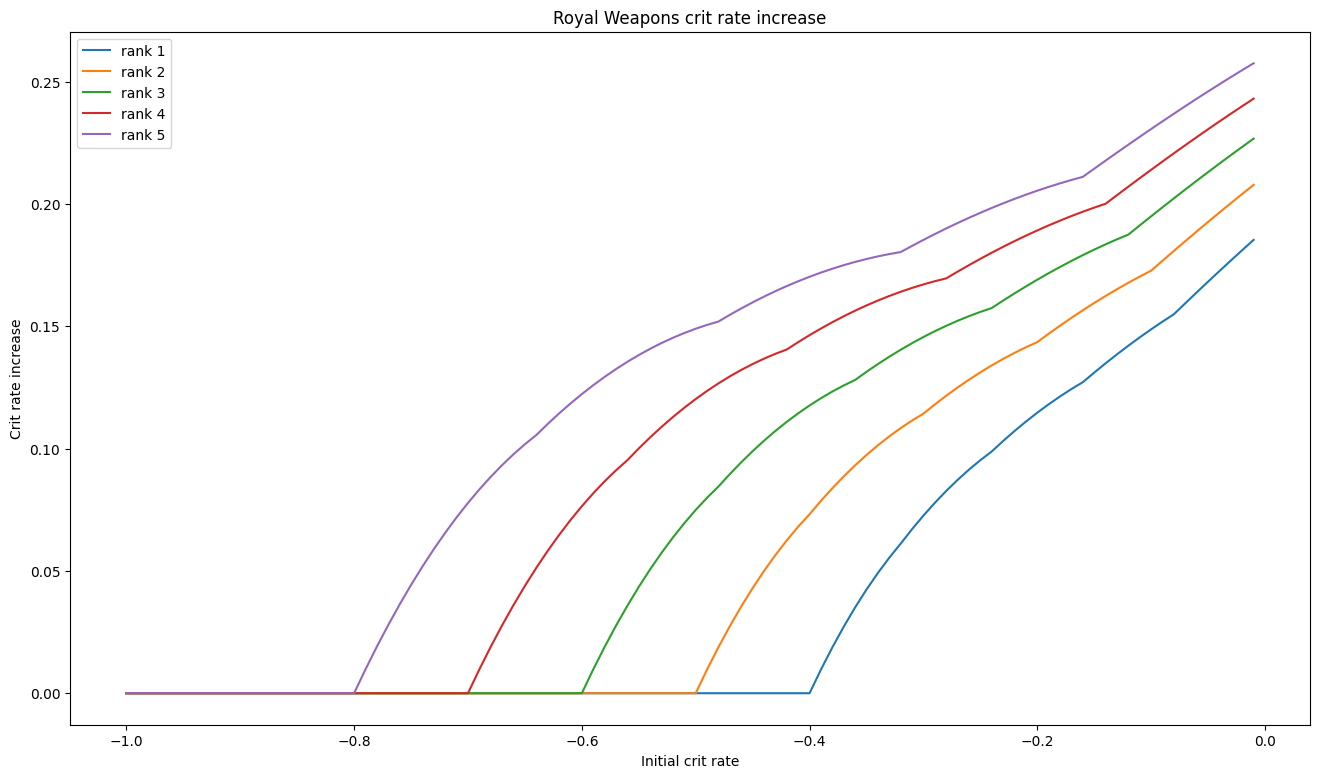

In [103]:
fig, ax = plt.subplots(figsize=(16, 9))
for label in results:
    ax.plot(domain, results[label], label=label)
ax.legend()

ax.set_title("Royal Weapons crit rate increase")
ax.set_xlabel("Initial crit rate")
ax.set_ylabel("Crit rate increase")

## 3. Conclusion

We can describe the Royal Series passive in the entire domain [-1, 1] 
by using the following piecewise function:

In [104]:
def royal_expr(r, p):
    '''
    Computes the expected crit rate increase of Royal Weapons
    given an initial crit rate of r and a crit rate increase per stack of p.
    '''
    if r < 0:
        return ((5*p + r)*max(0, r) - (5*p*r - 5*p + r**2 - r)*max(0, p + r) + (5*p**2*r - 5*p**2 + 6*p*r**2 - 11*p*r + 5*p + r**3 - 2*r**2 + r)*max(0, 2*p + r) - (10*p**3*r - 10*p**3 + 17*p**2*r**2 - 32*p**2*r + 15*p**2 + 8*p*r**3 - 21*p*r**2 + 18*p*r - 5*p + r**4 - 3*r**3 + 3*r**2 - r)*max(0, 3*p + r) + (30*p**4*r - 30*p**4 + 61*p**3*r**2 - 116*p**3*r + 55*p**3 + 41*p**2*r**3 - 112*p**2*r**2 + 101*p**2*r - 30*p**2 + 11*p*r**4 - 38*p*r**3 + 48*p*r**2 - 26*p*r + 5*p + r**5 - 4*r**4 + 6*r**3 - 4*r**2 + r)*max(0, 4*p + r) - (24*p**4*r - 24*p**4 + 50*p**3*r**2 - 100*p**3*r + 50*p**3 + 35*p**2*r**3 - 105*p**2*r**2 + 105*p**2*r - 35*p**2 + 10*p*r**4 - 40*p*r**3 + 60*p*r**2 - 40*p*r + 10*p + r**5 - 5*r**4 + 10*r**3 - 10*r**2 + 5*r - 1)*max(0, 5*p + r))/(6*p**4*r - 6*p**4 + 11*p**3*r**2 - 26*p**3*r + 15*p**3 + 6*p**2*r**3 - 24*p**2*r**2 + 33*p**2*r - 15*p**2 + p*r**4 - 6*p*r**3 + 15*p*r**2 - 20*p*r + 15*p + 1)
    else:
        return (5*p + r)/(6*p**4*r - 6*p**4 + 11*p**3*r**2 - 26*p**3*r + 15*p**3 + 6*p**2*r**3 - 24*p**2*r**2 + 33*p**2*r - 15*p**2 + p*r**4 - 6*p*r**3 + 15*p*r**2 - 20*p*r + 15*p + 1)

In [105]:
domain = np.arange(-1, 1, 0.01) # values of r
results = {} # dictionary to store results

for rank in range(1, 6):
    label = f'rank {rank}' # label for the plot
    stack = 0.08 + 0.02*(rank - 1) # stack value per rank
    results[label] = [] # initialize list for results
    for r0 in domain: # iterate over r values
        p = royal_expr(r0, stack) # compute probability
        p = p - max(0, r0) # what we want to know is the crit rate increase
        results[label].append(p)

Text(0, 0.5, 'Crit rate increase')

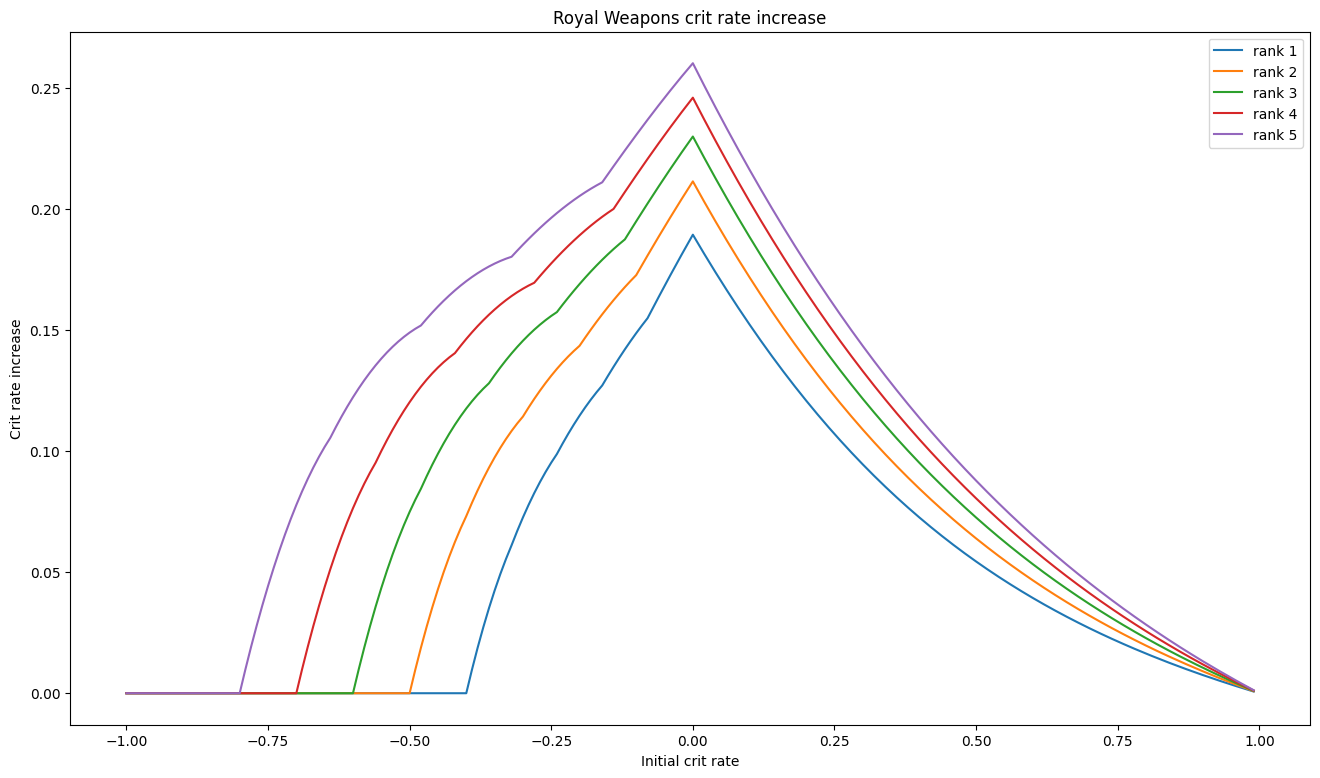

In [106]:
fig, ax = plt.subplots(figsize=(16, 9))
for label in results:
    ax.plot(domain, results[label], label=label)
ax.legend()

ax.set_title("Royal Weapons crit rate increase")
ax.set_xlabel("Initial crit rate")
ax.set_ylabel("Crit rate increase")